<a href="https://colab.research.google.com/github/samneuhaus1/IS_4487_Spring2023/blob/main/module4_script_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 4 Script

## Objectives

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to factors (categories)
*   Encode attributes

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [ ]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/retail_dataset.csv')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#look at the top rows
df.head(10) 

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,$5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,$171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,$19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,$15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,$27.93,2019-06,June
5,351,Glenn Reville,3 Springview Drive,Dallas,TX,75277.0,1006,2020-02-18,351,1006,106,4.0,106,Great value Juice,$1.99,$7.96,2020-02,February
6,233,Cosette Berkowitz,7619 Susan Lane,South Bend,IN,46634.0,1007,2019-10-25,233,1007,105,2.0,105,Office Chair,$55.99,$111.98,2019-10,October
7,121,Nisse Cunniam,0 Dennis Pass,Lincoln,NE,68531.0,1008,2019-11-10,121,1008,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,2019-11,November
8,232,Yank Eayrs,8176 Lawn Drive,Washington,DC,20575.0,1009,2019-09-27,232,1009,110,1.0,110,Apple iPad Mini,$329.99,$329.99,2019-09,September
9,113,Jamesy Brothwood,0693 Evergreen Pass,Scranton,PA,18514.0,1010,2019-09-02,113,1010,108,1.0,108,Printer,$59.99,$59.99,2019-09,September


In [ ]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


In [ ]:
#describe the data before cleaning it
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


postal_code and quantity have null values that could possibly corrected. Postal code could be gathered with State and city information. Quantity could be gathered from order price and total.

Cleaning up null values.

In [ ]:
df_clean = df.dropna(how='any',axis=0) 

df_clean.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000
mean,268.464982,52230.965371,4974.766173,268.464982,4974.766173,106.688231,3.344394,106.688231
std,189.860282,29663.530626,2034.447409,189.860282,2034.447409,3.657543,4.244108,3.657543
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,121.000000,27404.000000,3246.000000,121.000000,3246.000000,104.000000,1.000000,104.000000
50%,243.000000,48295.000000,5430.000000,243.000000,5430.000000,107.000000,1.000000,107.000000
75%,362.000000,79923.000000,6675.000000,362.000000,6675.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


state_province
AK                           AxesSubplot(0.125,0.125;0.775x0.755)
AL                           AxesSubplot(0.125,0.125;0.775x0.755)
AR                           AxesSubplot(0.125,0.125;0.775x0.755)
AZ                           AxesSubplot(0.125,0.125;0.775x0.755)
Alabama                      AxesSubplot(0.125,0.125;0.775x0.755)
                                             ...                 
WY                           AxesSubplot(0.125,0.125;0.775x0.755)
Washington                   AxesSubplot(0.125,0.125;0.775x0.755)
West Virginia                AxesSubplot(0.125,0.125;0.775x0.755)
Wisconsin                    AxesSubplot(0.125,0.125;0.775x0.755)
Wyoming                      AxesSubplot(0.125,0.125;0.775x0.755)
Name: order_id, Length: 92, dtype: object

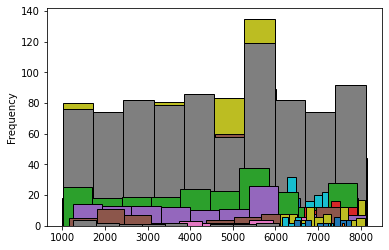

In [ ]:
df.groupby('state_province')['order_id'].plot(kind ='hist', edgecolor = 'black')

State Dictionary for re-evaluating state values.

In [ ]:
df = pd.DataFrame({'Alabama': ['AL'], 'Alaska': ['AK'], 
                   'Arizona': ['AR'], 'Arkansas': ['AR'], 
                   'California': ['CA'], 'Colorado': ['CO'], 'Connecticut': ['CT'], 
                   'Delaware': ['DE'], 'Florida': ['FL'], 'Georgia': ['GA'], 
                   'Hawaii': ['HI'], 'Idaho': ['ID'], 'Illinois': ['IL'], 
                   'Indiana': ['IN'], 'Iowa': ['IA'], 'Kansas': ['KS'], 
                   'Kentucky': ['KY'], 'Louisiana': ['LA'], 
                   'Maine': ['ME'], 'Maryland': ['MD'], 
                   'Massachusetts': ['MA'], 'Michigan': ['MI'], 
                   'Minnesota': ['MN'], 'Mississippi': ['MS'], 
                   'Missouri': ['MO'], 'Montana': ['MT'], 
                   'Nebraska': ['NE'], 'Nevada': ['NV'], 
                   'New Hampshire': ['NH'], 'New Jersey': ['NJ'], 
                   'New Mexico': ['NM'], 'New York': ['NY'], 
                   'North Carolina': ['NC'], 'North Dakota': ['ND'], 
                   'Ohio': ['OH'], 'Oklahoma': ['OK'], 
                   'Oregon': ['OR'], 'Pennsylvania': ['PA'], 
                   'Rhode Island': ['RI'], 'South Carolina': ['SC'], 
                   'South Dakota': ['SD'], 'Tennessee': ['TN'], 
                   'Texas': ['TX'], 'Utah': ['UT'], 
                   'Vermont': ['VT'], 'Virginia': ['VA'], 
                   'Washington': ['WA'], 'West Virginia': ['WV'], 
                   'Wisconsin': ['WI'], 'Wyoming': ['WY']})